In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [2]:
df = pd.read_csv("bank.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Learning : How to Convert Unstructured data to Structured format.**

In [3]:
df.shape

(4521, 17)

In [4]:
df.rename(columns={'y':'Term_Deposit'},inplace=True)

In [5]:
# Saving Structured data
df.to_csv("C:/Users/USER/Downloads/Prodogy Infotech Assignment/DS_03/Bank_data_new.csv",index=False)

In [6]:
bank_df = pd.read_csv("Bank_data_new.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_Deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
bank_df.shape

(4521, 17)

In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           4521 non-null   int64 
 1   job           4521 non-null   object
 2   marital       4521 non-null   object
 3   education     4521 non-null   object
 4   default       4521 non-null   object
 5   balance       4521 non-null   int64 
 6   housing       4521 non-null   object
 7   loan          4521 non-null   object
 8   contact       4521 non-null   object
 9   day           4521 non-null   int64 
 10  month         4521 non-null   object
 11  duration      4521 non-null   int64 
 12  campaign      4521 non-null   int64 
 13  pdays         4521 non-null   int64 
 14  previous      4521 non-null   int64 
 15  poutcome      4521 non-null   object
 16  Term_Deposit  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [10]:
bank_df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
Term_Deposit    0
dtype: int64

In [11]:
bank_df.duplicated().sum()

0

In [12]:
# bank_df.rename(columns={'y':'Term_Deposit'},inplace=True)

In [13]:
for col in bank_df.columns:
    if bank_df[col].dtypes == 'object':
        print(bank_df[col].value_counts())
        print("-------------------------")

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64
-------------------------
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
-------------------------
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64
-------------------------
default
no     4445
yes      76
Name: count, dtype: int64
-------------------------
housing
yes    2559
no     1962
Name: count, dtype: int64
-------------------------
loan
no     3830
yes     691
Name: count, dtype: int64
-------------------------
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64
-------------------------
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb   

#### Let's Impute 'Unknown and 'other' categories in Categorical features with their Mode values

In [14]:
bank_df['job'].mode()

0    management
Name: job, dtype: object

In [15]:
bank_df['job'] = bank_df['job'].replace({'unknown':'management'})
bank_df['education'] = bank_df['education'].replace({'unknown':'secondary'})
bank_df['contact'] = bank_df['contact'].replace({'unknown':'other'})
bank_df['poutcome'] = bank_df['poutcome'].replace({'unknown':'other'})

In [16]:
for col in bank_df.columns:
    if bank_df[col].dtypes == 'object':
        print(bank_df[col].value_counts())
        print("-------------------------")

job
management       1007
blue-collar       946
technician        768
admin.            478
services          417
retired           230
self-employed     183
entrepreneur      168
unemployed        128
housemaid         112
student            84
Name: count, dtype: int64
-------------------------
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
-------------------------
education
secondary    2493
tertiary     1350
primary       678
Name: count, dtype: int64
-------------------------
default
no     4445
yes      76
Name: count, dtype: int64
-------------------------
housing
yes    2559
no     1962
Name: count, dtype: int64
-------------------------
loan
no     3830
yes     691
Name: count, dtype: int64
-------------------------
contact
cellular     2896
other        1324
telephone     301
Name: count, dtype: int64
-------------------------
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      8

In [17]:
cat_col = bank_df.select_dtypes(include='object').columns
num_col = bank_df.select_dtypes(include='int64').columns
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)

Categorical Columns : Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Term_Deposit'],
      dtype='object')
Numerical Columns : Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


### Outlier Detection

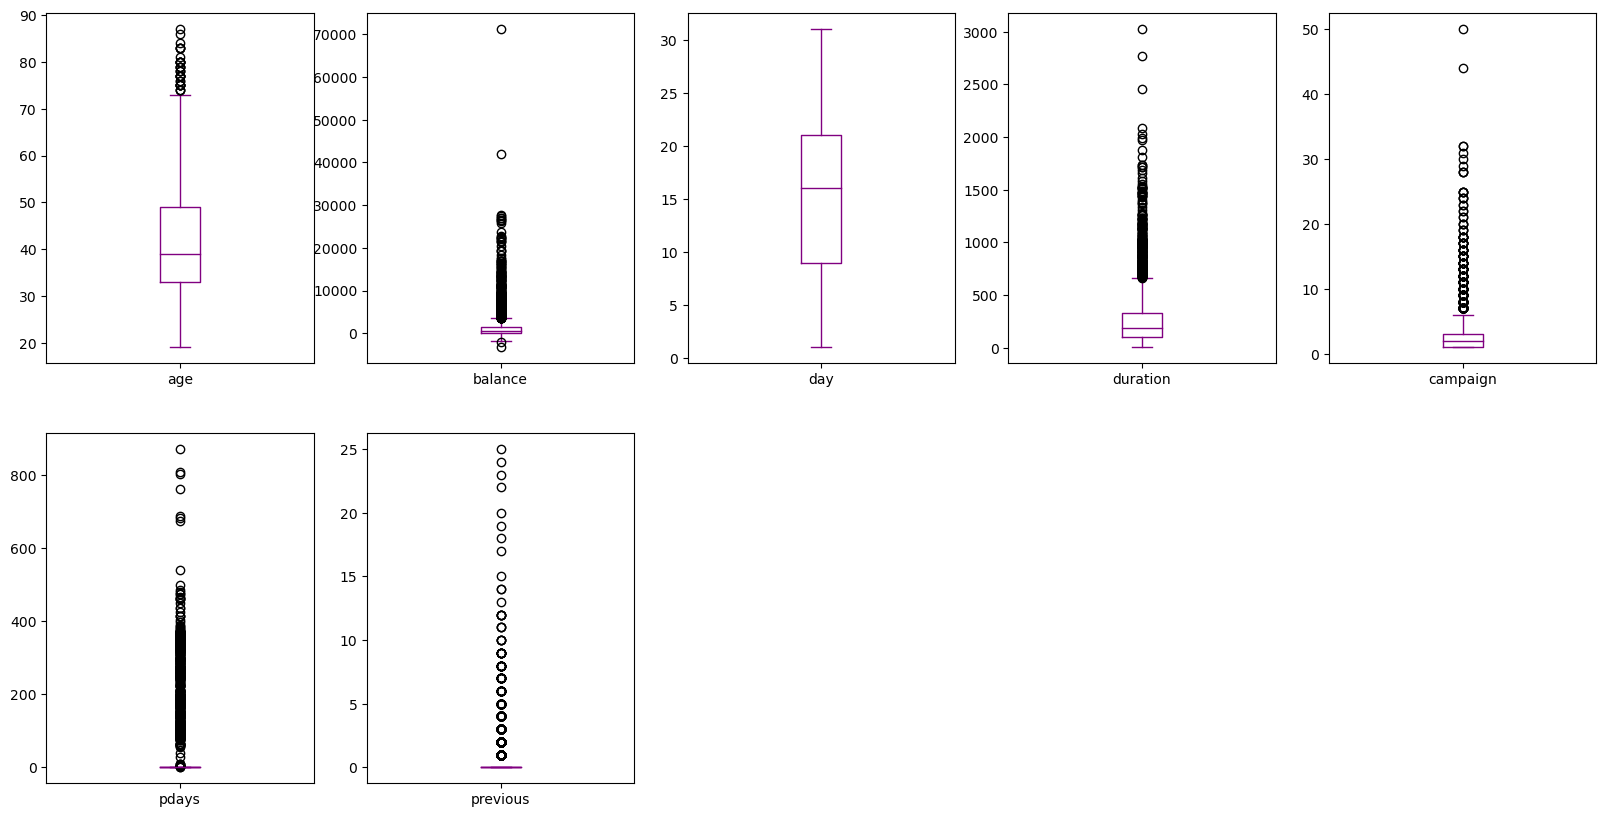

In [28]:
bank_df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='purple')
plt.show()

* Outliers are present in all numeric features exceplt day.
* Data is highly Right skewed.

### Exploratory Data Analysis

In [20]:
for col in bank_df.columns:
    if bank_df[col].dtypes == 'int64':
        print(bank_df[col].value_counts())
        print("-------------------------")

age
34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: count, Length: 67, dtype: int64
-------------------------
balance
0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: count, Length: 2353, dtype: int64
-------------------------
day
20    257
18    226
19    201
21    198
14    195
17    191
7     190
6     187
28    181
5     181
8     180
29    175
15    174
30    168
13    166
16    164
9     163
11    152
12    151
4     139
2     114
27    113
26    110
3     105
23    102
22     86
25     80
31     59
10     50
24     36
1      27
Name: count, dtype: int64
-------------------------
duration
123     27
104     25
119     23
77      22
58      22
        ..
762      1
602      1
923      1
1032     1
660      1
Name: count, Length: 875, dtype: int64
-------------------------
campaign
1     1734
2     1264
3      558
4      325
5 

### Countplot of all Categorical Columns

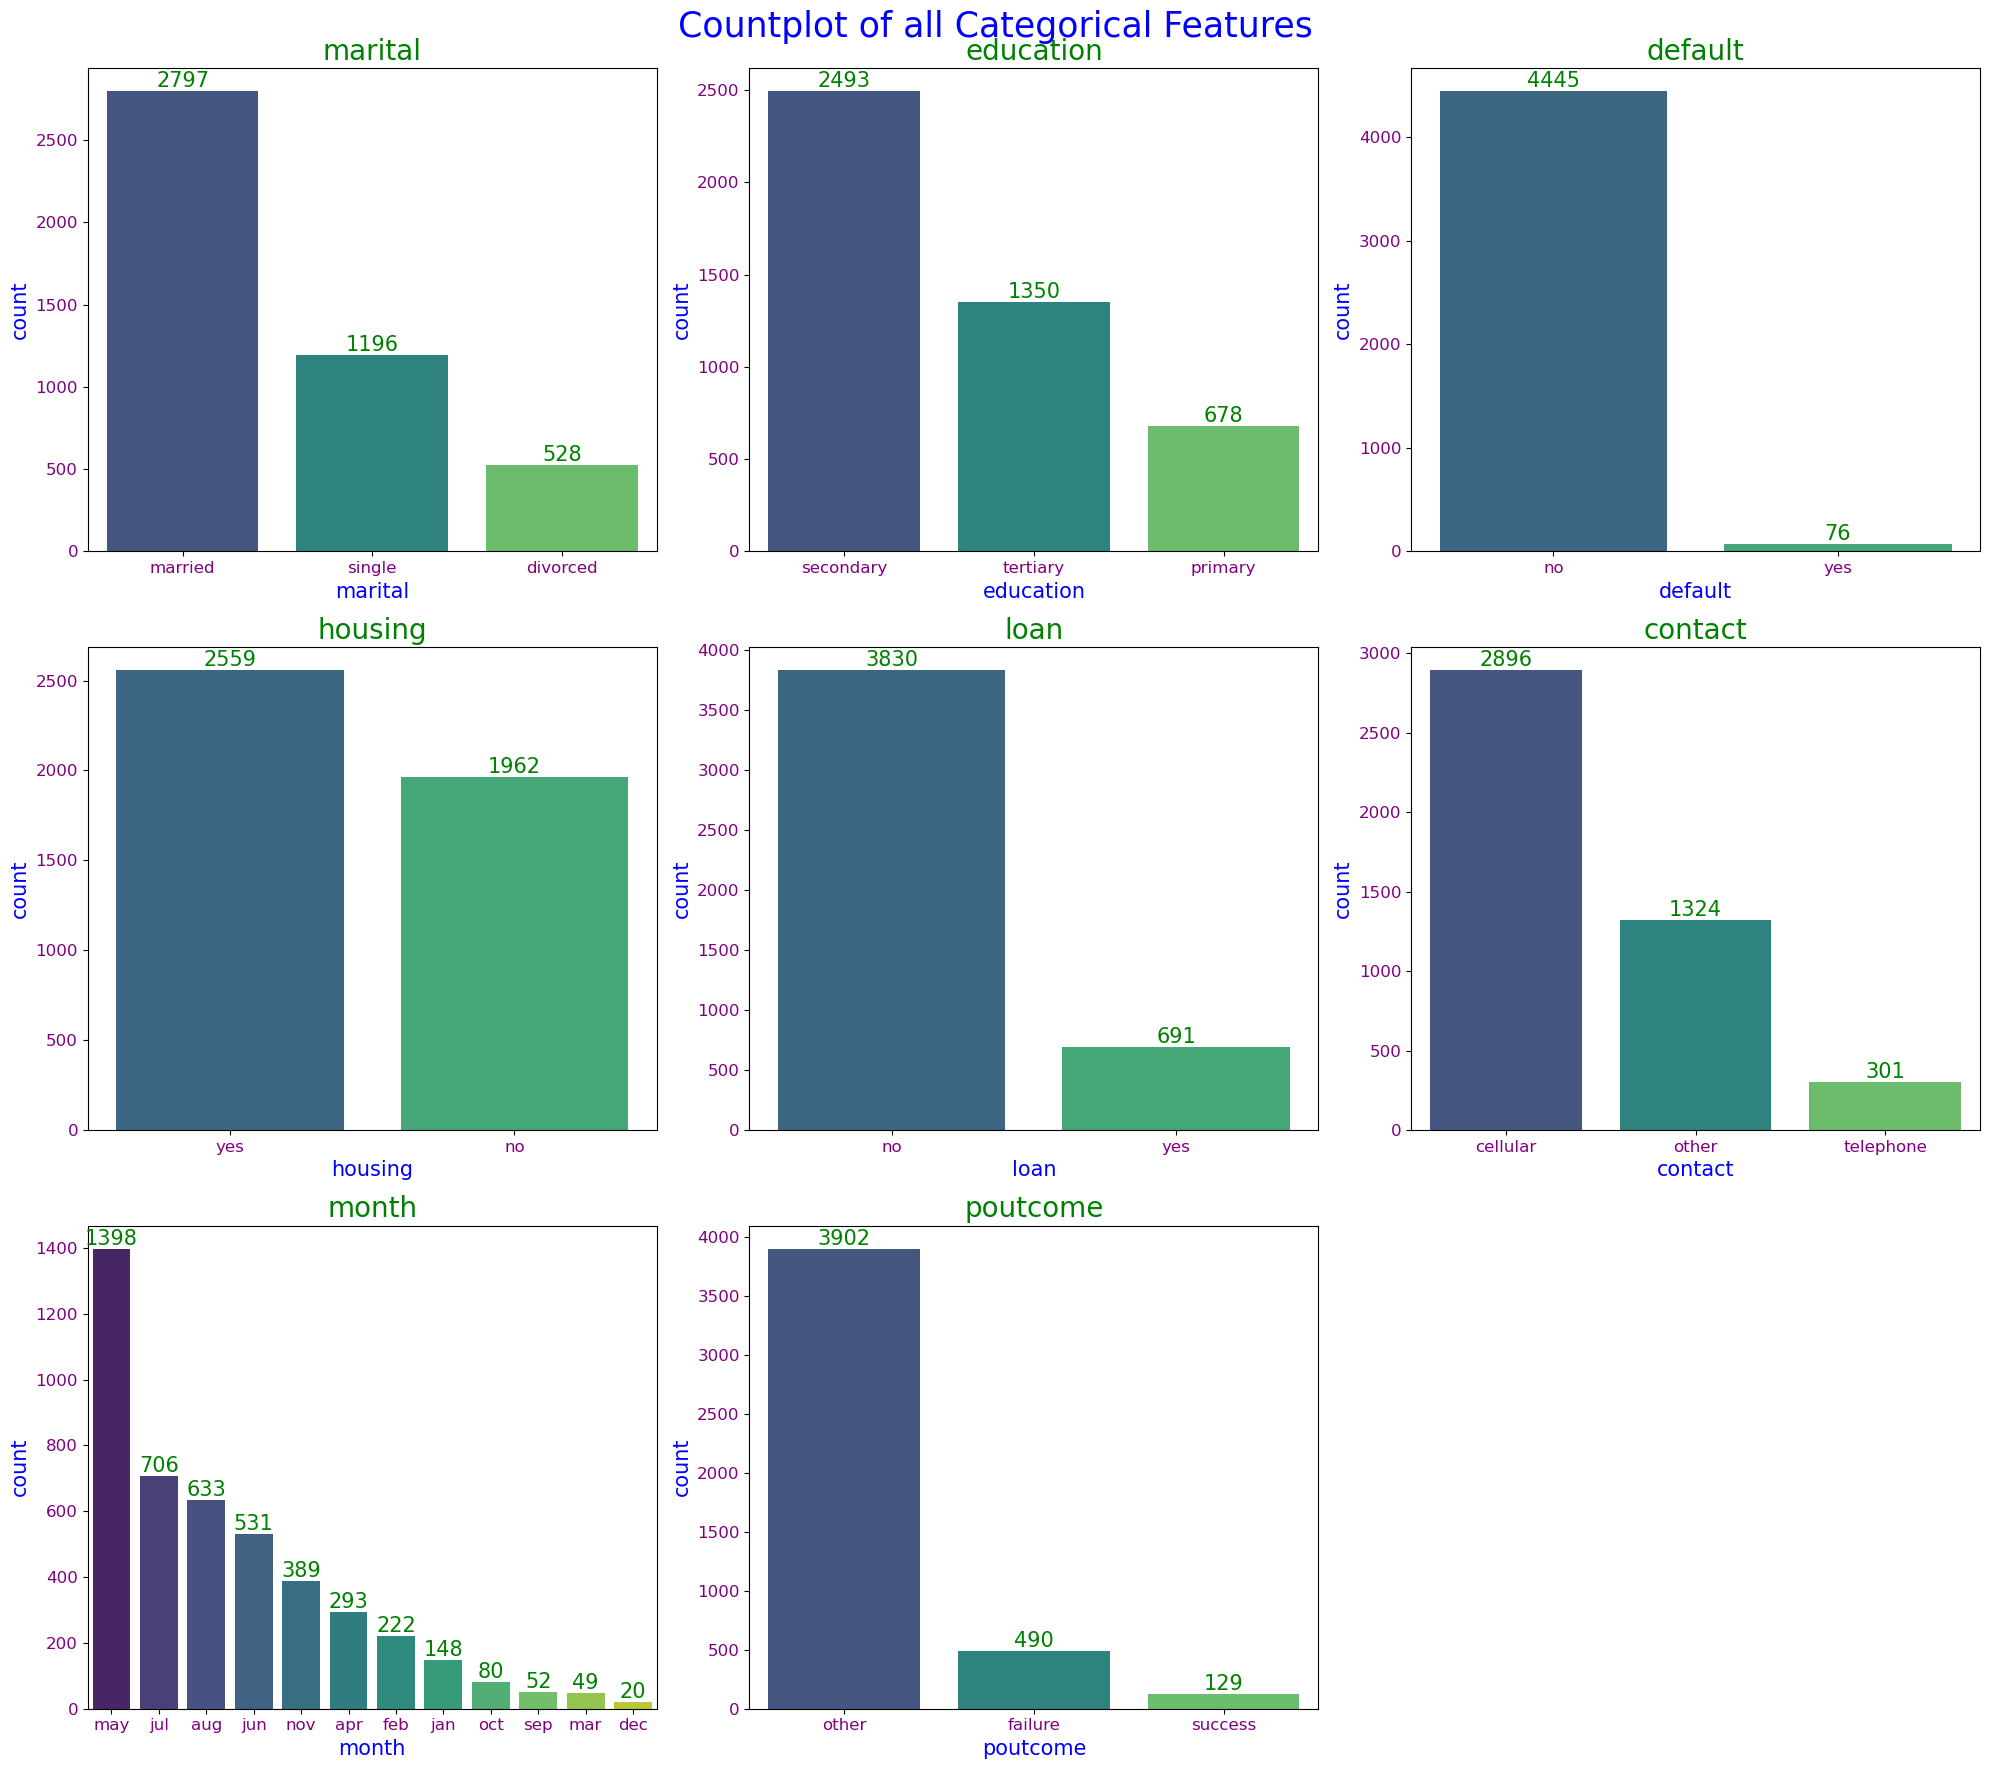

In [69]:
cat_col1 = ['marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'poutcome',]
fig = plt.figure(figsize=(20,18))
plt.suptitle('Countplot of all Categorical Features', fontsize = 25,color='blue')

for i in range(0,len(cat_col1)):    
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x=bank_df[cat_col1[i]],data=bank_df,order=bank_df[cat_col1[i]].value_counts().index,palette='viridis')
    for bars in ax.containers:
        ax.bar_label(bars,color='green',fontsize=15)
    plt.title("{}".format(cat_col1[i]),color='green',fontsize=20)
    plt.xlabel(cat_col1[i],color='blue',fontsize=15)
    plt.ylabel("count",fontsize=15,color='blue')
    plt.xticks(color='purple',fontsize=12)
    plt.yticks(color='purple',fontsize=12);
fig.tight_layout() 
plt.show()

* Maximum customers are contacted in month May. 
* May is the most Contacted Month.

In [21]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Term_Deposit'],
      dtype='object')

**Distribution of Job**

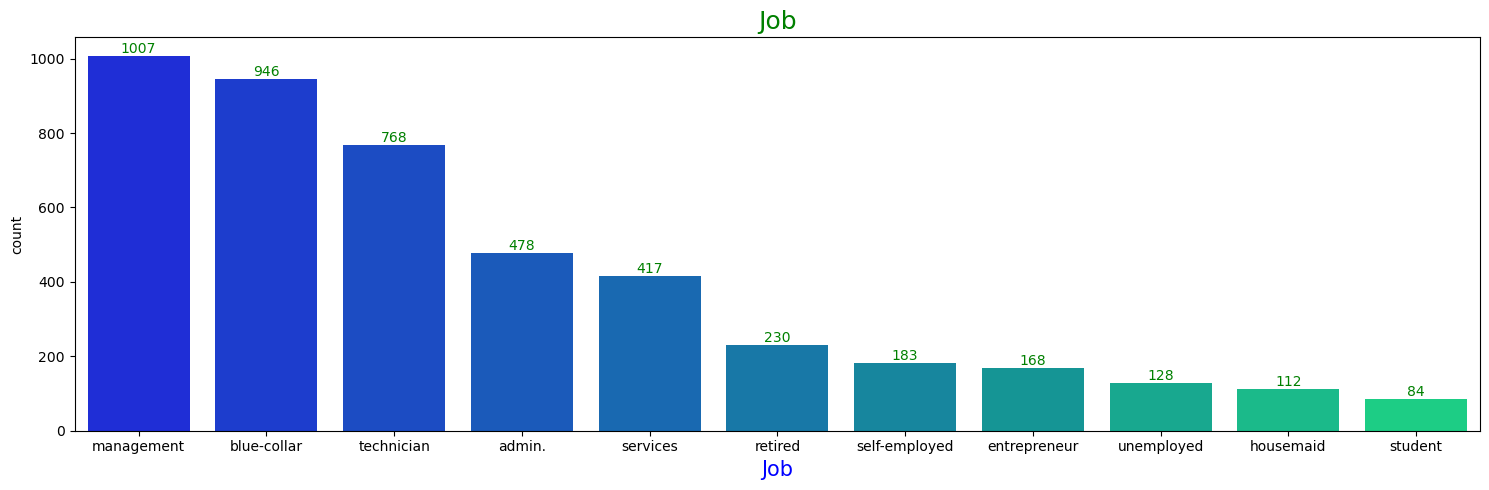

In [23]:
plt.figure(figsize=(15,5))
#fig,axes = plt.subplots(1,3)
#fig.set_size_inches(18,5)

ax=sns.countplot(x=bank_df['job'],data=bank_df,order=bank_df['job'].value_counts().index,palette='winter')
for bars in ax.containers:
        ax.bar_label(bars,color='green',fontsize=10)
ax.set_title("Job",color='green',fontsize=18)
# ax.set_xticks(rotation=45)
ax.set_xlabel("Job",color='blue',fontsize=15)
plt.tight_layout()
plt.show()

###  Distribution of Target Variable

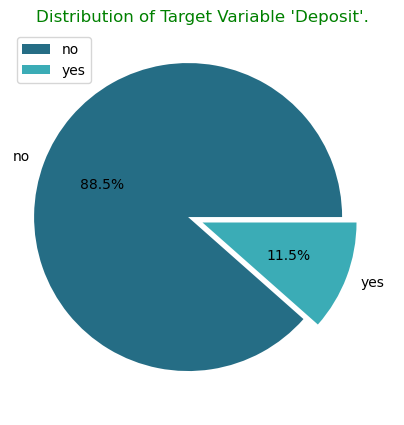

In [24]:
plt.figure(figsize=(5,5))
label = bank_df['Term_Deposit'].value_counts().keys()
plt.pie(data=bank_df,x=bank_df['Term_Deposit'].value_counts(),labels=label,autopct="%.1f%%",explode=[0.1, 0],colors= ['#256D85', '#3BACB6'])
plt.title("Distribution of Target Variable 'Deposit'.",color='green')
#print("Here 5 stands for High Score and 1 for Poor Score")
plt.legend(loc='upper left')     # loc='upper left'

plt.show()

* Target Class is Imbalanced.
* 88.5% of the customers have not subscribed to the Term Deposit and only 11.5% customers have subscribed to Term Deposit.

(-1.051127515038203,
 1.1488724832079757,
 -1.1910548001703425,
 1.0927919458653053)

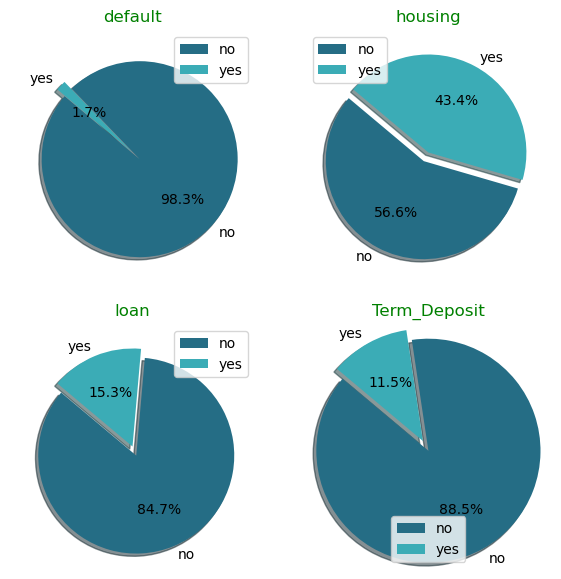

In [58]:
plt.figure(figsize=(7,7))
explode = [0.1,0]
# plt.subplot(2,2,i)
l = ['default','housing','loan','Term_Deposit']
for i in range(len(l)):
    plt.subplot(2,2,i+1)
    plt.pie(bank_df[l[i]].value_counts(), explode=explode, labels=bank_df[l[i]].unique(), autopct='%1.1f%%', shadow=True, startangle=140,colors= ['#256D85', '#3BACB6'])
    plt.title(l[i],color='green')
    plt.legend()

plt.axis('equal') 

### Distribution of Continuous Variable

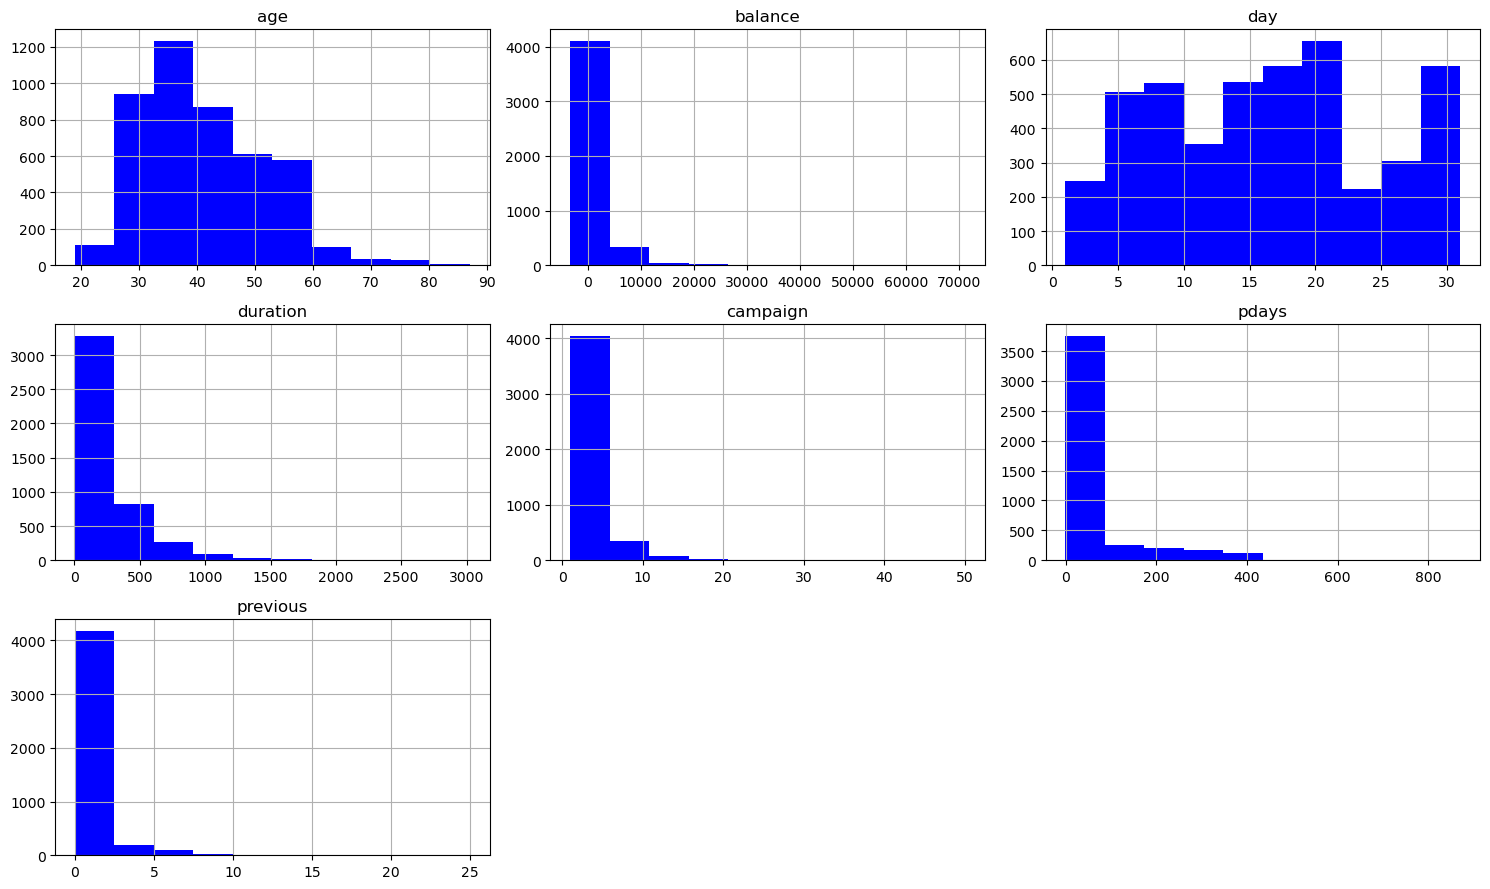

In [25]:
bank_df.hist(num_col,figsize=(15,9),color='blue')
#sns.histplot(df)
plt.tight_layout()
plt.show()

In [19]:
bank_df[bank_df['pdays'] == 871]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_Deposit
2249,49,unemployed,divorced,tertiary,no,780,no,no,cellular,8,nov,148,1,871,2,failure,no


In [27]:
bank_df[bank_df['duration'] == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_Deposit


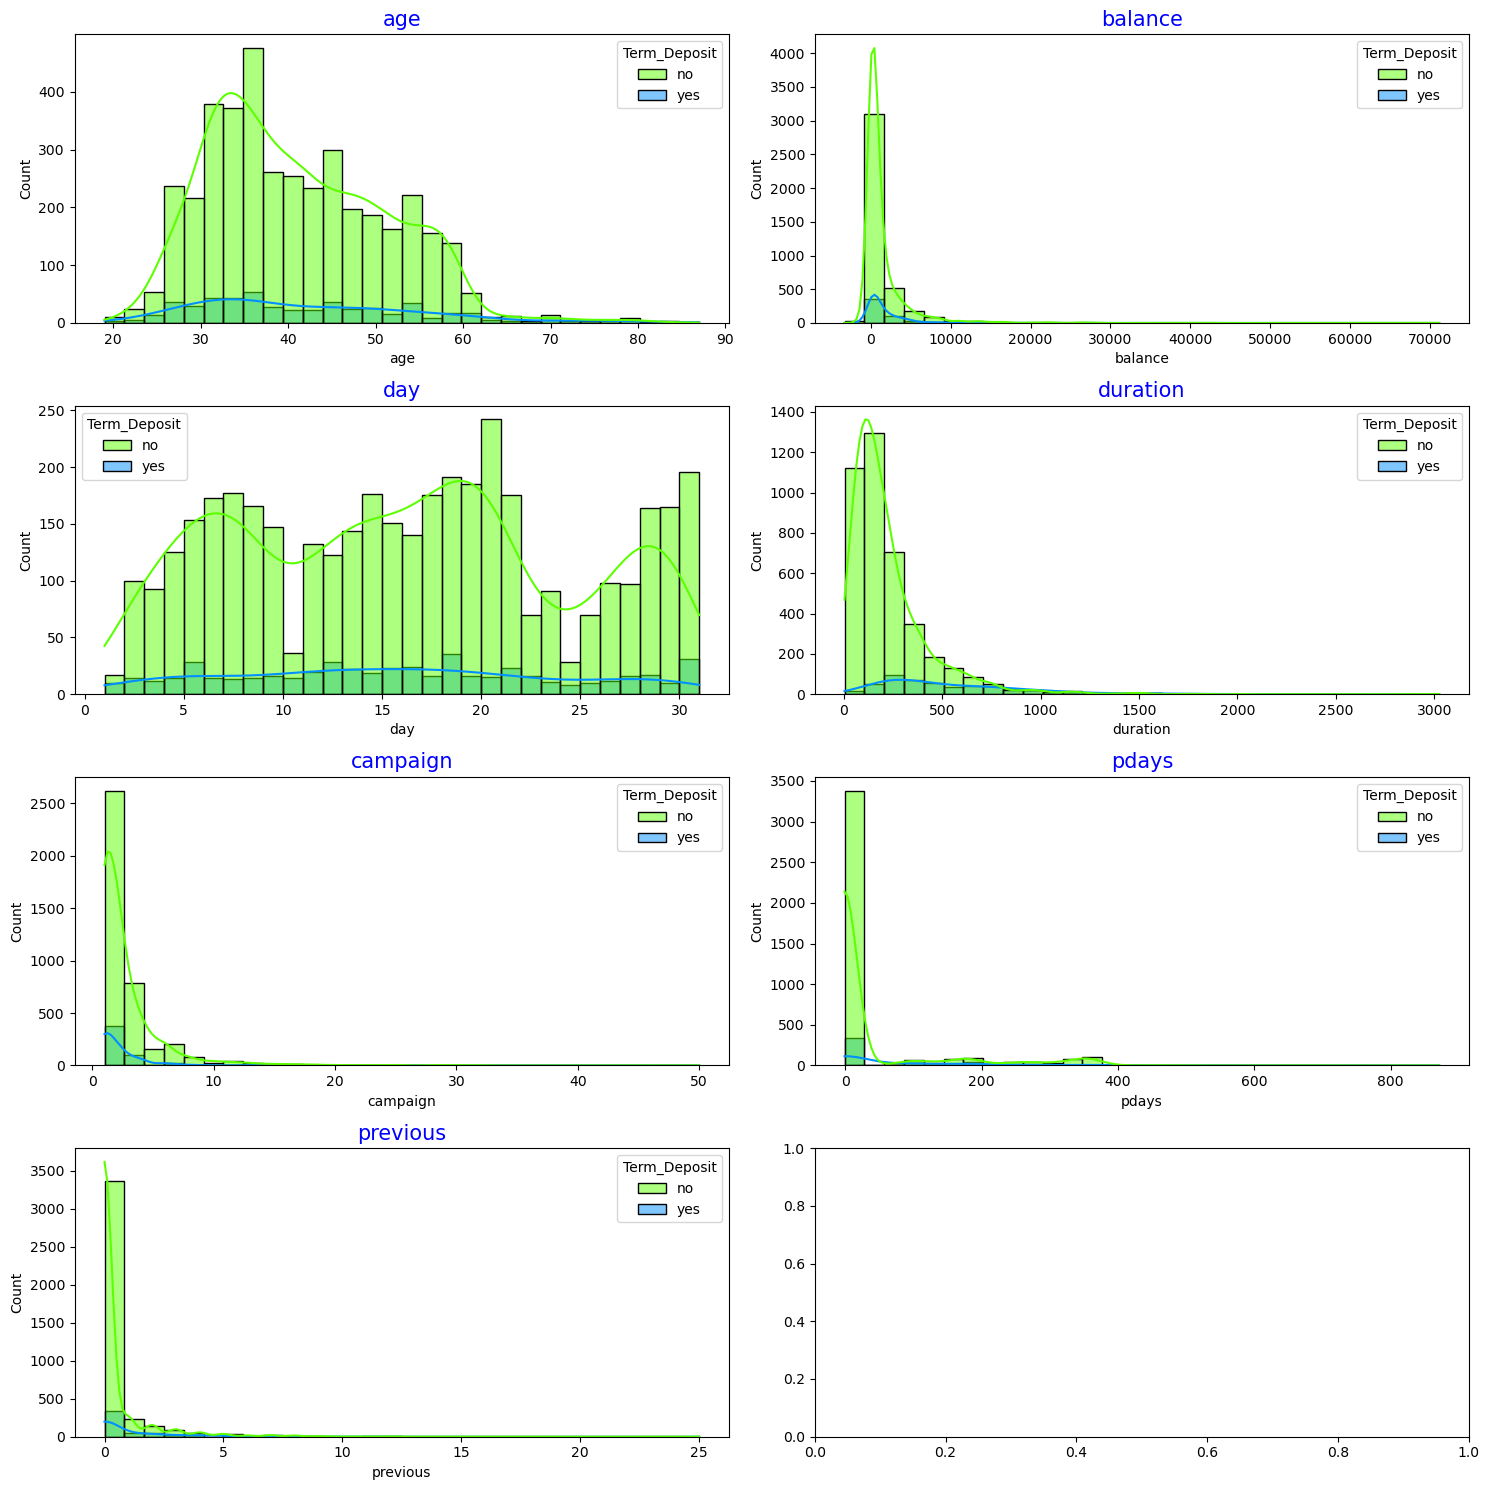

In [29]:
fig,axes = plt.subplots(4,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.2)
for i,j in zip(num_col,axes.flatten()):
    axes=sns.histplot(data = bank_df,x = i,ax=j,hue='Term_Deposit',bins=30,kde=True, palette='gist_rainbow')
    axes.set_title(i,color='blue',fontsize=15)
fig.tight_layout()
plt.show()

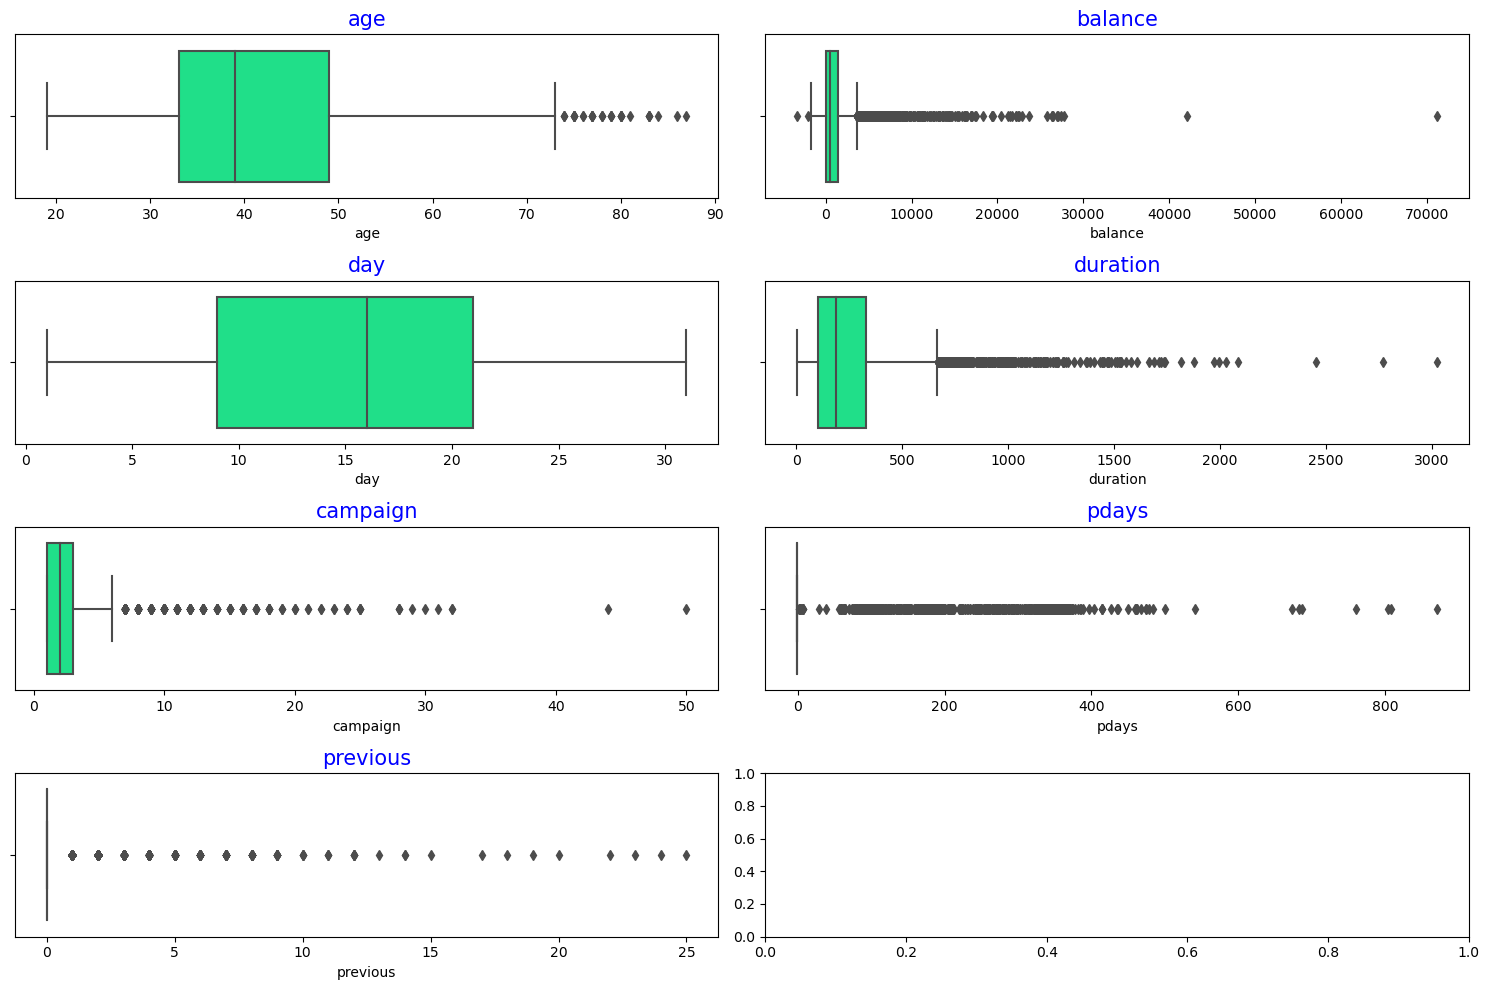

In [30]:
fig,axes = plt.subplots(4,2,figsize=(15,10))
plt.subplots_adjust(hspace=0.2)
for i,j in zip(num_col,axes.flatten()):
    axes=sns.boxplot(data = bank_df,x = i, ax=j,palette ='gist_rainbow')
    axes.set_title(i,color='blue',fontsize=15)
fig.tight_layout()
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


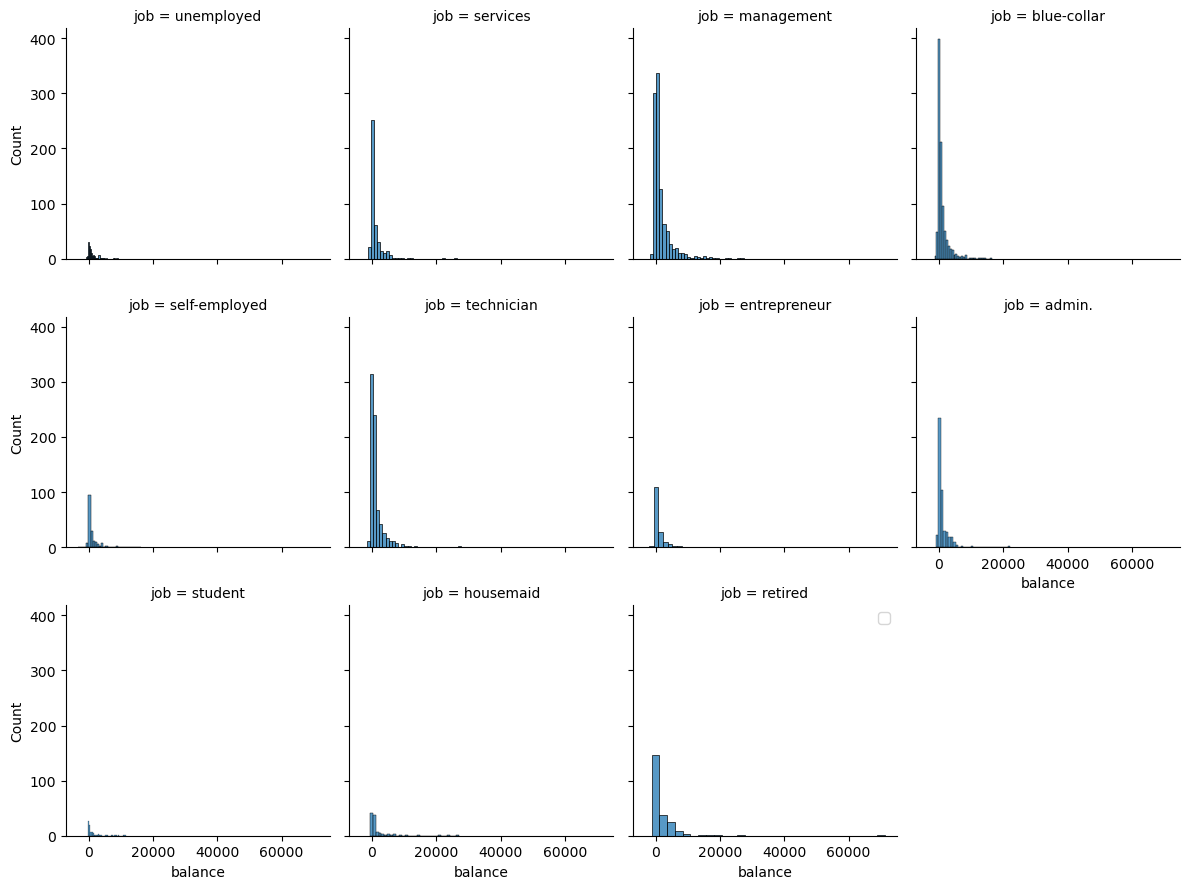

In [31]:
g = sns.FacetGrid(bank_df, col="job",col_wrap=4,palette='gist_rainbow')
g.map(sns.histplot, "balance",bins=30);
plt.legend()
#plt.title("Male Customers")
g.tight_layout()

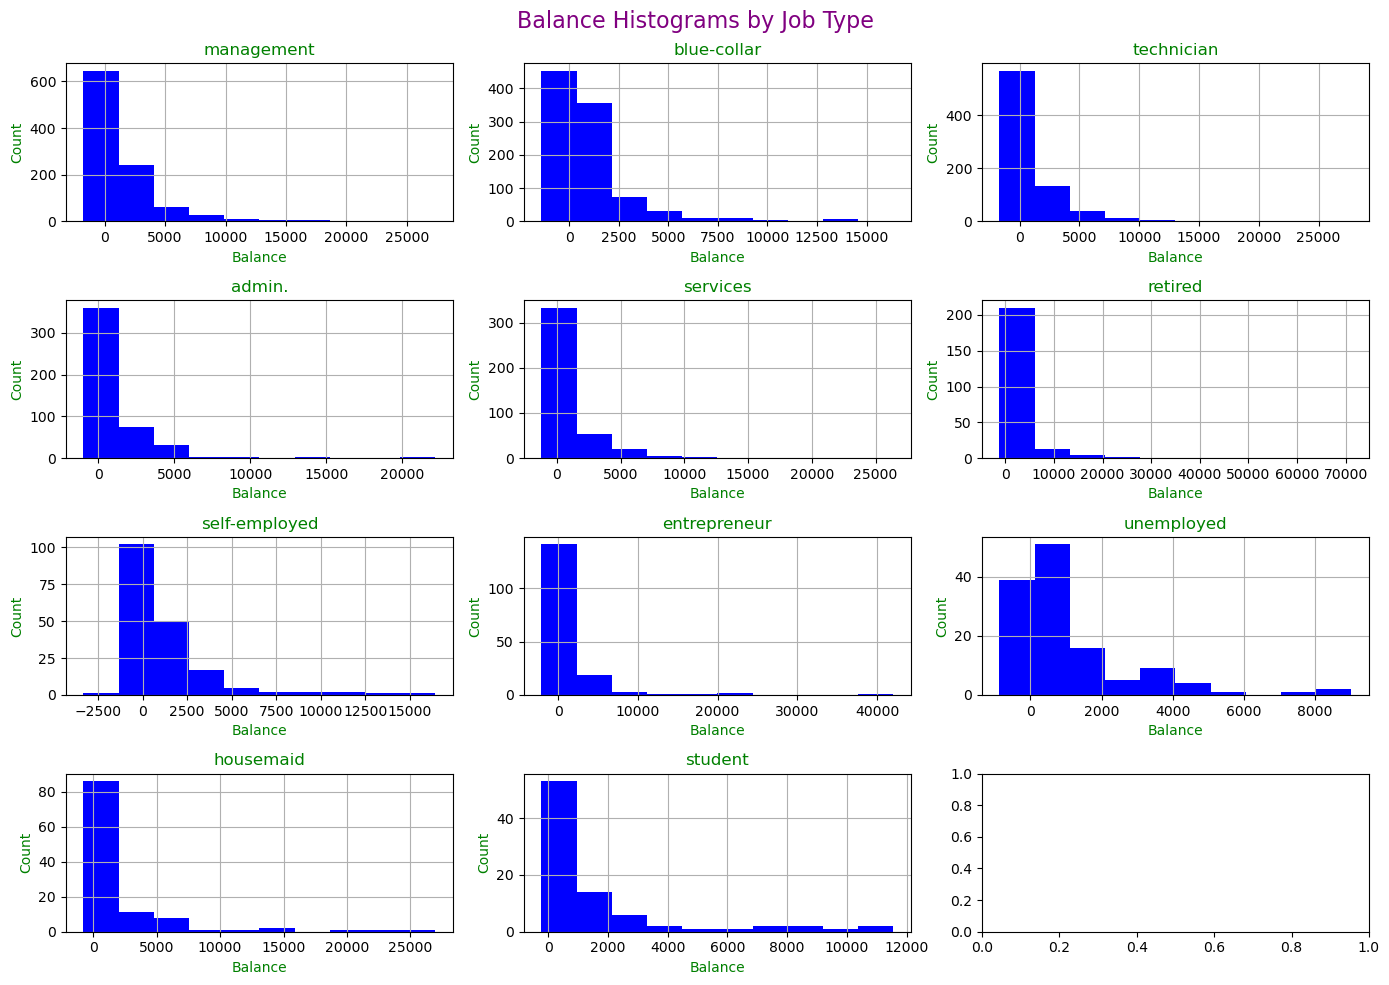

In [32]:
fig, axes = plt.subplots(4, 3, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each job type in a different subplot
for i, job in enumerate(bank_df['job'].value_counts().index):
    bank_df[bank_df['job'] == job]['balance'].hist(ax=axes[i],color='blue')
    axes[i].set_title(job,color='green')
    axes[i].set_xlabel('Balance',color='green')
    axes[i].set_ylabel('Count',color='green')
fig.suptitle('Balance Histograms by Job Type', fontsize=16,color='purple')
plt.tight_layout()
plt.show()


* self_employed have more Negative balance than others.

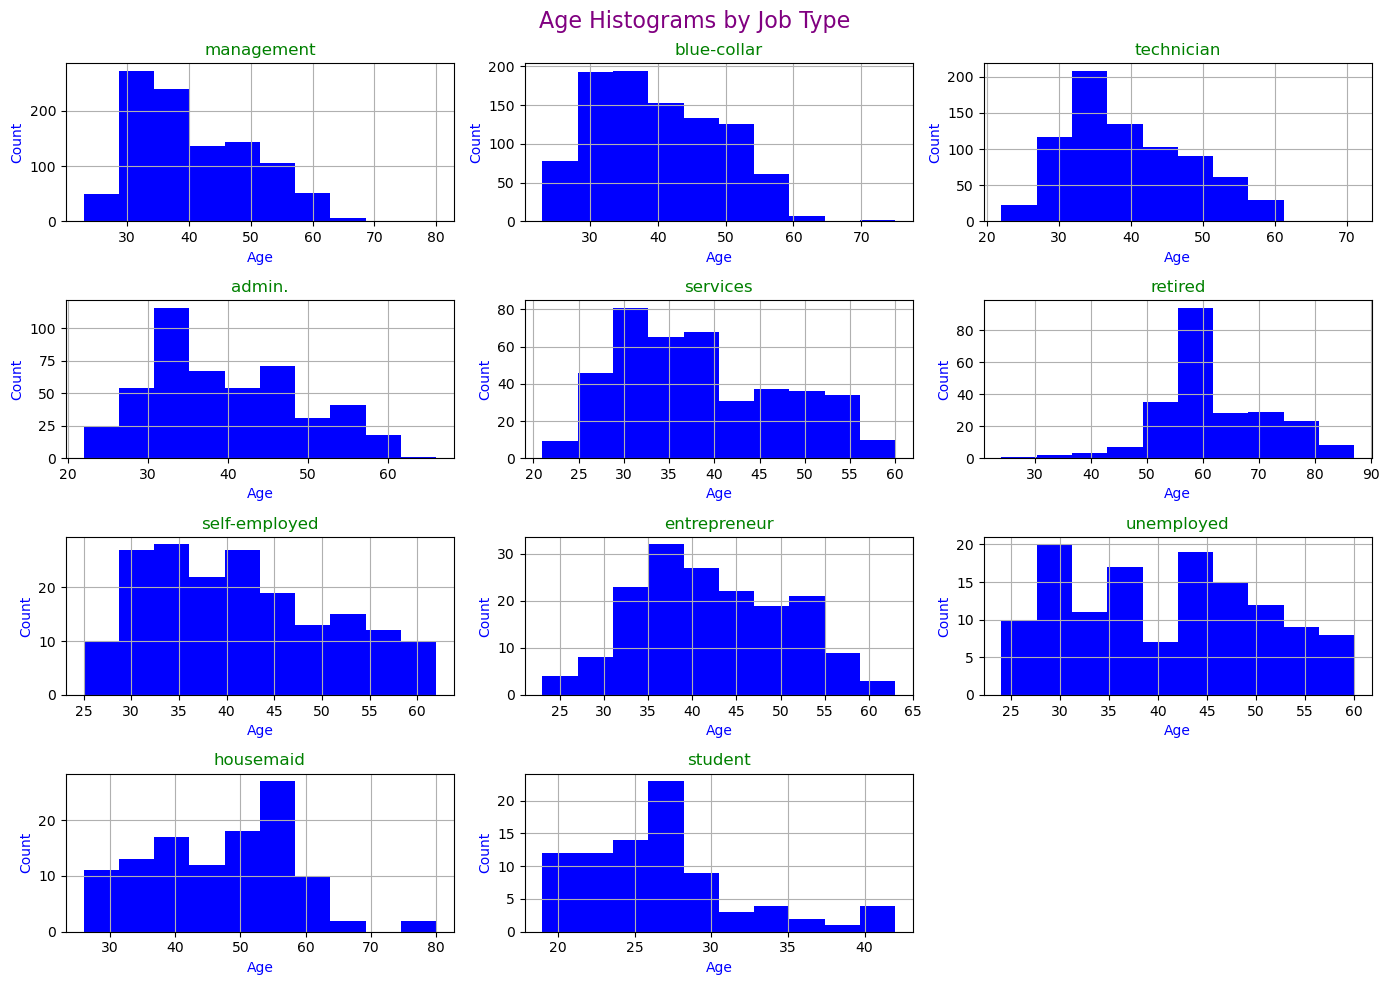

In [54]:
fig, axes = plt.subplots(4, 3, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each job type in a different subplot
for i, job in enumerate(bank_df['job'].value_counts().index):
    bank_df[bank_df['job'] == job]['age'].hist(ax=axes[i],color='blue')
    axes[i].set_title(job,color='green')
    axes[i].set_xlabel('Age',color='blue')
    axes[i].set_ylabel('Count',color='blue')
for j in range(i + 1, 4 * 3):
    fig.delaxes(axes[j])
fig.suptitle('Age Histograms by Job Type', fontsize=16,color='purple')
plt.tight_layout()
plt.show()

In [33]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Term_Deposit'],
      dtype='object')

<Figure size 500x300 with 0 Axes>

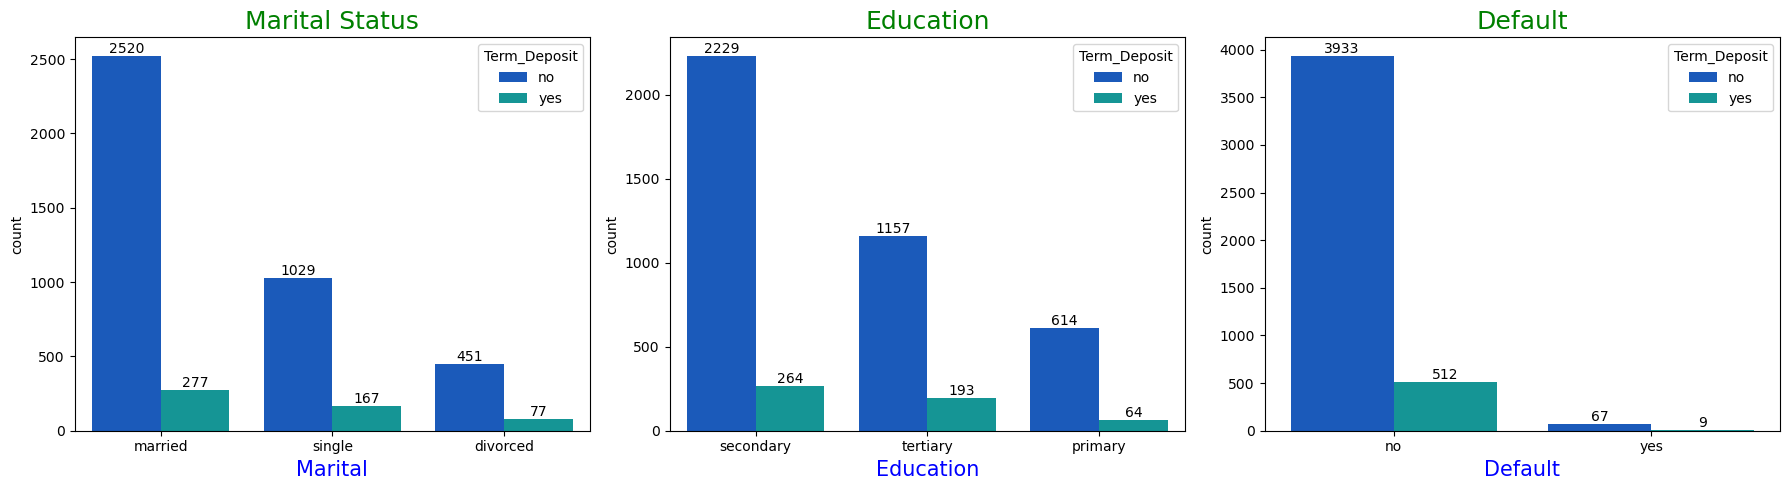

In [34]:
plt.figure(figsize=(5,3))
fig,axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax=sns.countplot(x=bank_df['marital'],data=bank_df,order=bank_df['marital'].value_counts().index,hue='Term_Deposit',palette='winter',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("Marital Status",color='green',fontsize=18)
ax.set_xlabel("Marital",color='blue',fontsize=15)

ax1=sns.countplot(x=bank_df['education'],data=bank_df,order=bank_df['education'].value_counts().index,hue='Term_Deposit',palette='winter',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars)
ax1.set_title("Education",color='green',fontsize=18)
ax1.set_xlabel("Education",color='blue',fontsize=15)

ax2=sns.countplot(x=bank_df['default'],data=bank_df,order=bank_df['default'].value_counts().index,hue='Term_Deposit',palette='winter',ax=axes[2])
for bars in ax2.containers:
        ax2.bar_label(bars)
ax2.set_title("Default",color='green',fontsize=18)
ax2.set_xlabel("Default",color='blue',fontsize=15)

fig.tight_layout()
plt.show()

<Figure size 500x300 with 0 Axes>

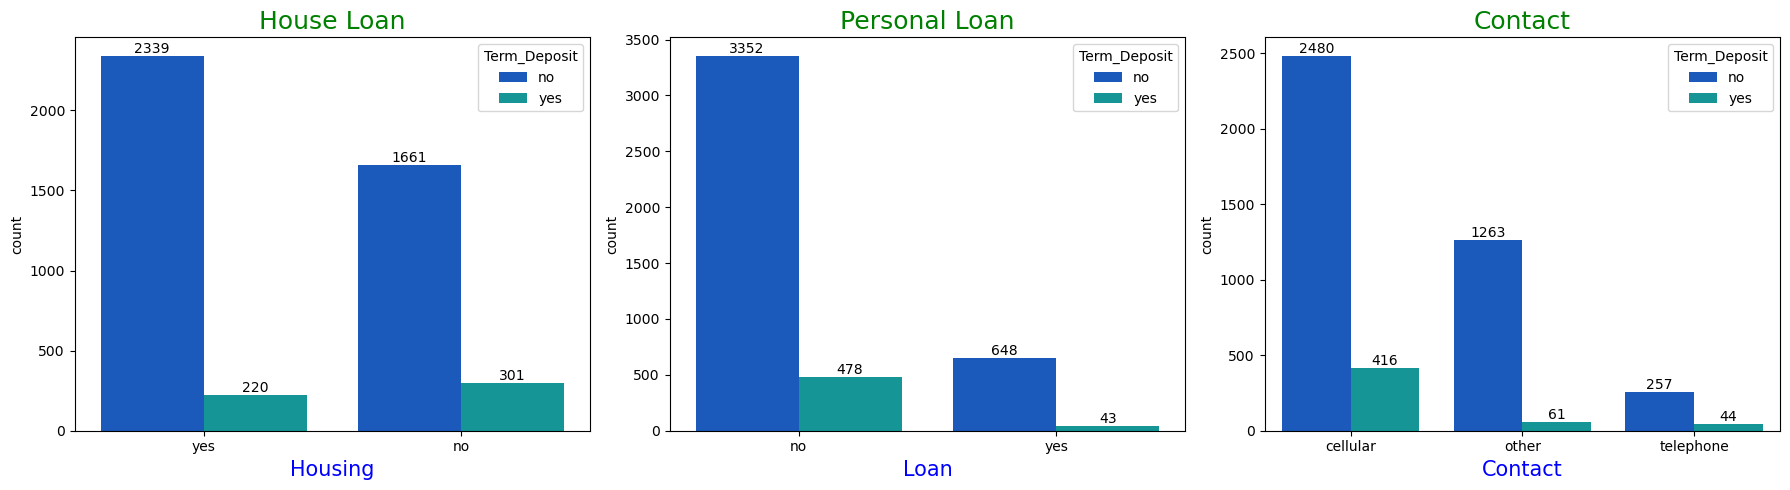

In [35]:
plt.figure(figsize=(5,3))
fig,axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax=sns.countplot(x=bank_df['housing'],data=bank_df,order=bank_df['housing'].value_counts().index,hue='Term_Deposit',palette='winter',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("House Loan",color='green',fontsize=18)
ax.set_xlabel("Housing",color='blue',fontsize=15)

ax1=sns.countplot(x=bank_df['loan'],data=bank_df,order=bank_df['loan'].value_counts().index,hue='Term_Deposit',palette='winter',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars)
ax1.set_title("Personal Loan",color='green',fontsize=18)
ax1.set_xlabel("Loan",color='blue',fontsize=15)

ax2=sns.countplot(x=bank_df['contact'],data=bank_df,order=bank_df['contact'].value_counts().index,hue='Term_Deposit',palette='winter',ax=axes[2])
for bars in ax2.containers:
        ax2.bar_label(bars)
ax2.set_title("Contact",color='green',fontsize=18)
ax2.set_xlabel("Contact",color='blue',fontsize=15)

fig.tight_layout()
plt.show()

<Figure size 500x300 with 0 Axes>

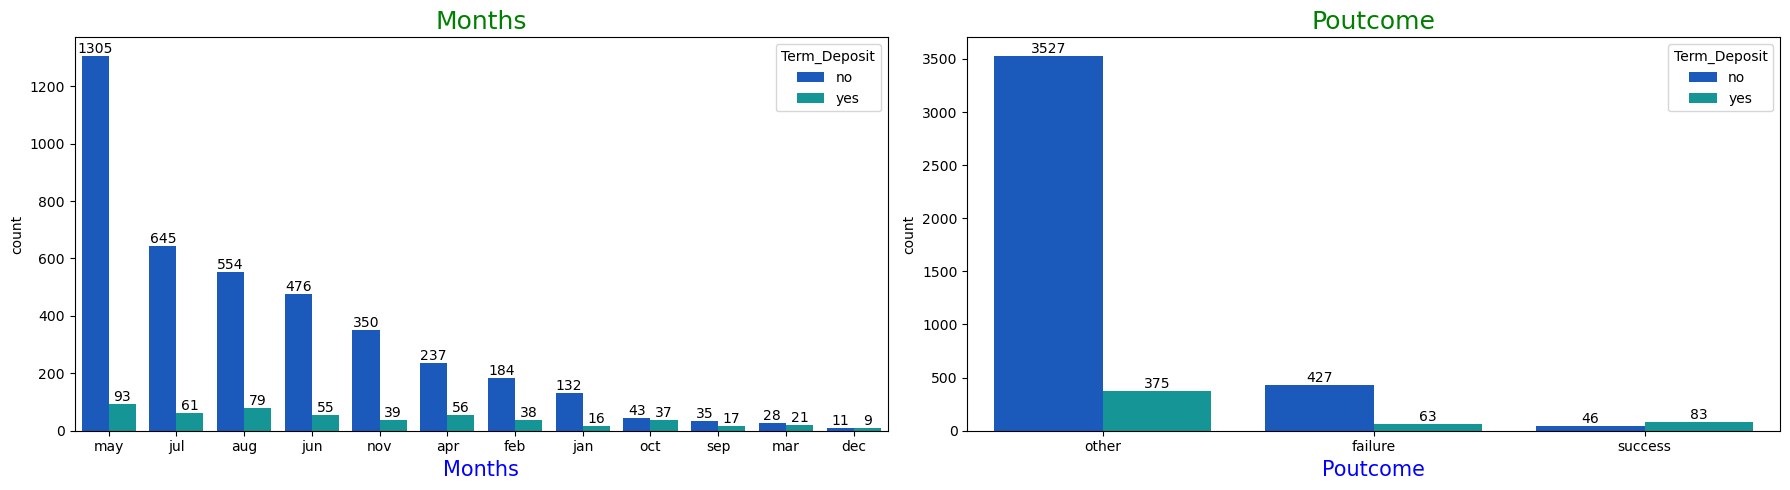

In [106]:
plt.figure(figsize=(5,3))
fig,axes = plt.subplots(1,2)
fig.set_size_inches(18,5)

ax=sns.countplot(x=bank_df['month'],data=bank_df,order=bank_df['month'].value_counts().index,hue='Term_Deposit',palette='winter',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("Months",color='green',fontsize=18)
ax.set_xlabel("Months",color='blue',fontsize=15)

ax1=sns.countplot(x=bank_df['poutcome'],data=bank_df,order=bank_df['poutcome'].value_counts().index,hue='Term_Deposit',palette='winter',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars)
ax1.set_title("Poutcome",color='green',fontsize=18)
ax1.set_xlabel("Poutcome",color='blue',fontsize=15)

fig.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9272\3967625195.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


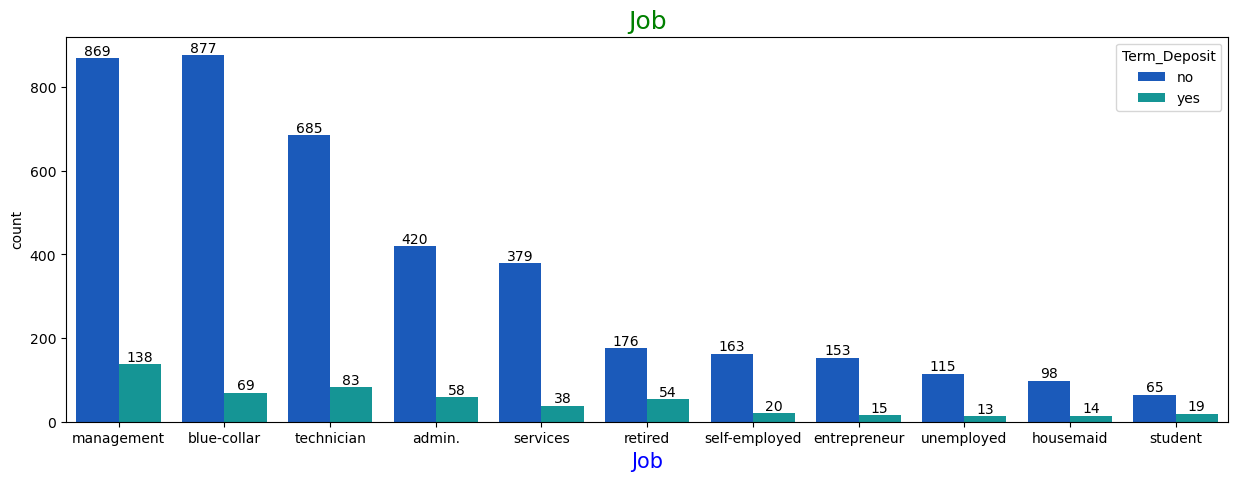

In [36]:
plt.figure(figsize=(15,5))
# fig,axes = plt.subplots(1,2)
# fig.set_size_inches(18,5)

ax=sns.countplot(x=bank_df['job'],data=bank_df,order=bank_df['job'].value_counts().index,hue='Term_Deposit',palette='winter')
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("Job",color='green',fontsize=18)
ax.set_xlabel("Job",color='blue',fontsize=15)

fig.tight_layout()
plt.show()

<Axes: xlabel='poutcome'>

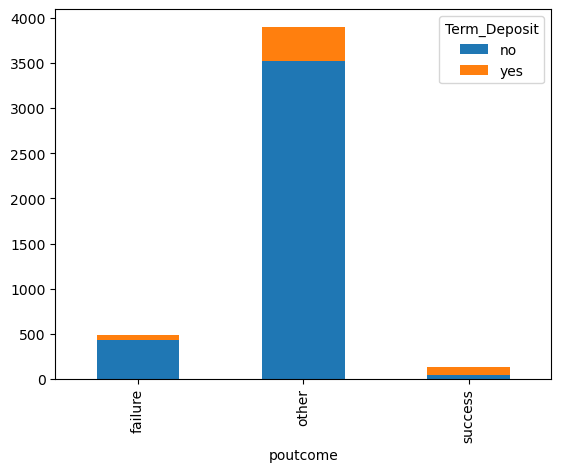

In [59]:
# bar chart for poutcome
types = bank_df.groupby("poutcome")['Term_Deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [37]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Term_Deposit'],
      dtype='object')

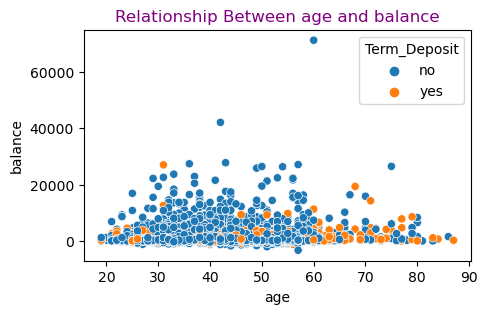

In [43]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='age',y='balance',data=bank_df,hue='Term_Deposit')
plt.title('Relationship Between age and balance',color='purple')
plt.show()

* There is no Linear relationship between Balance & Age.

In [40]:
bank_df['balance'].describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

<Axes: >

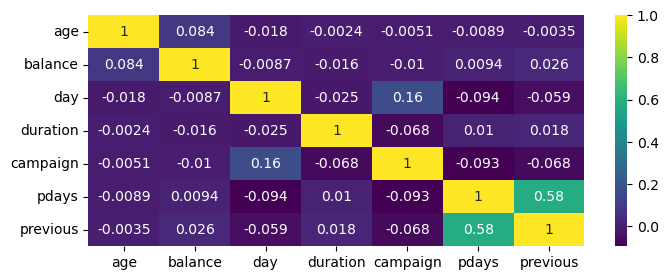

In [49]:
plt.figure(figsize=(8,3))
sns.heatmap(bank_df.corr(numeric_only=True),annot=True,cmap='viridis')

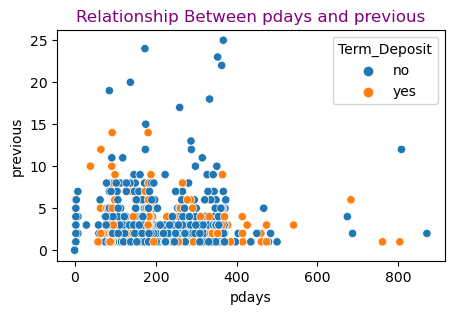

In [50]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='pdays',y='previous',data=bank_df,hue='Term_Deposit')
plt.title('Relationship Between pdays and previous',color='purple')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


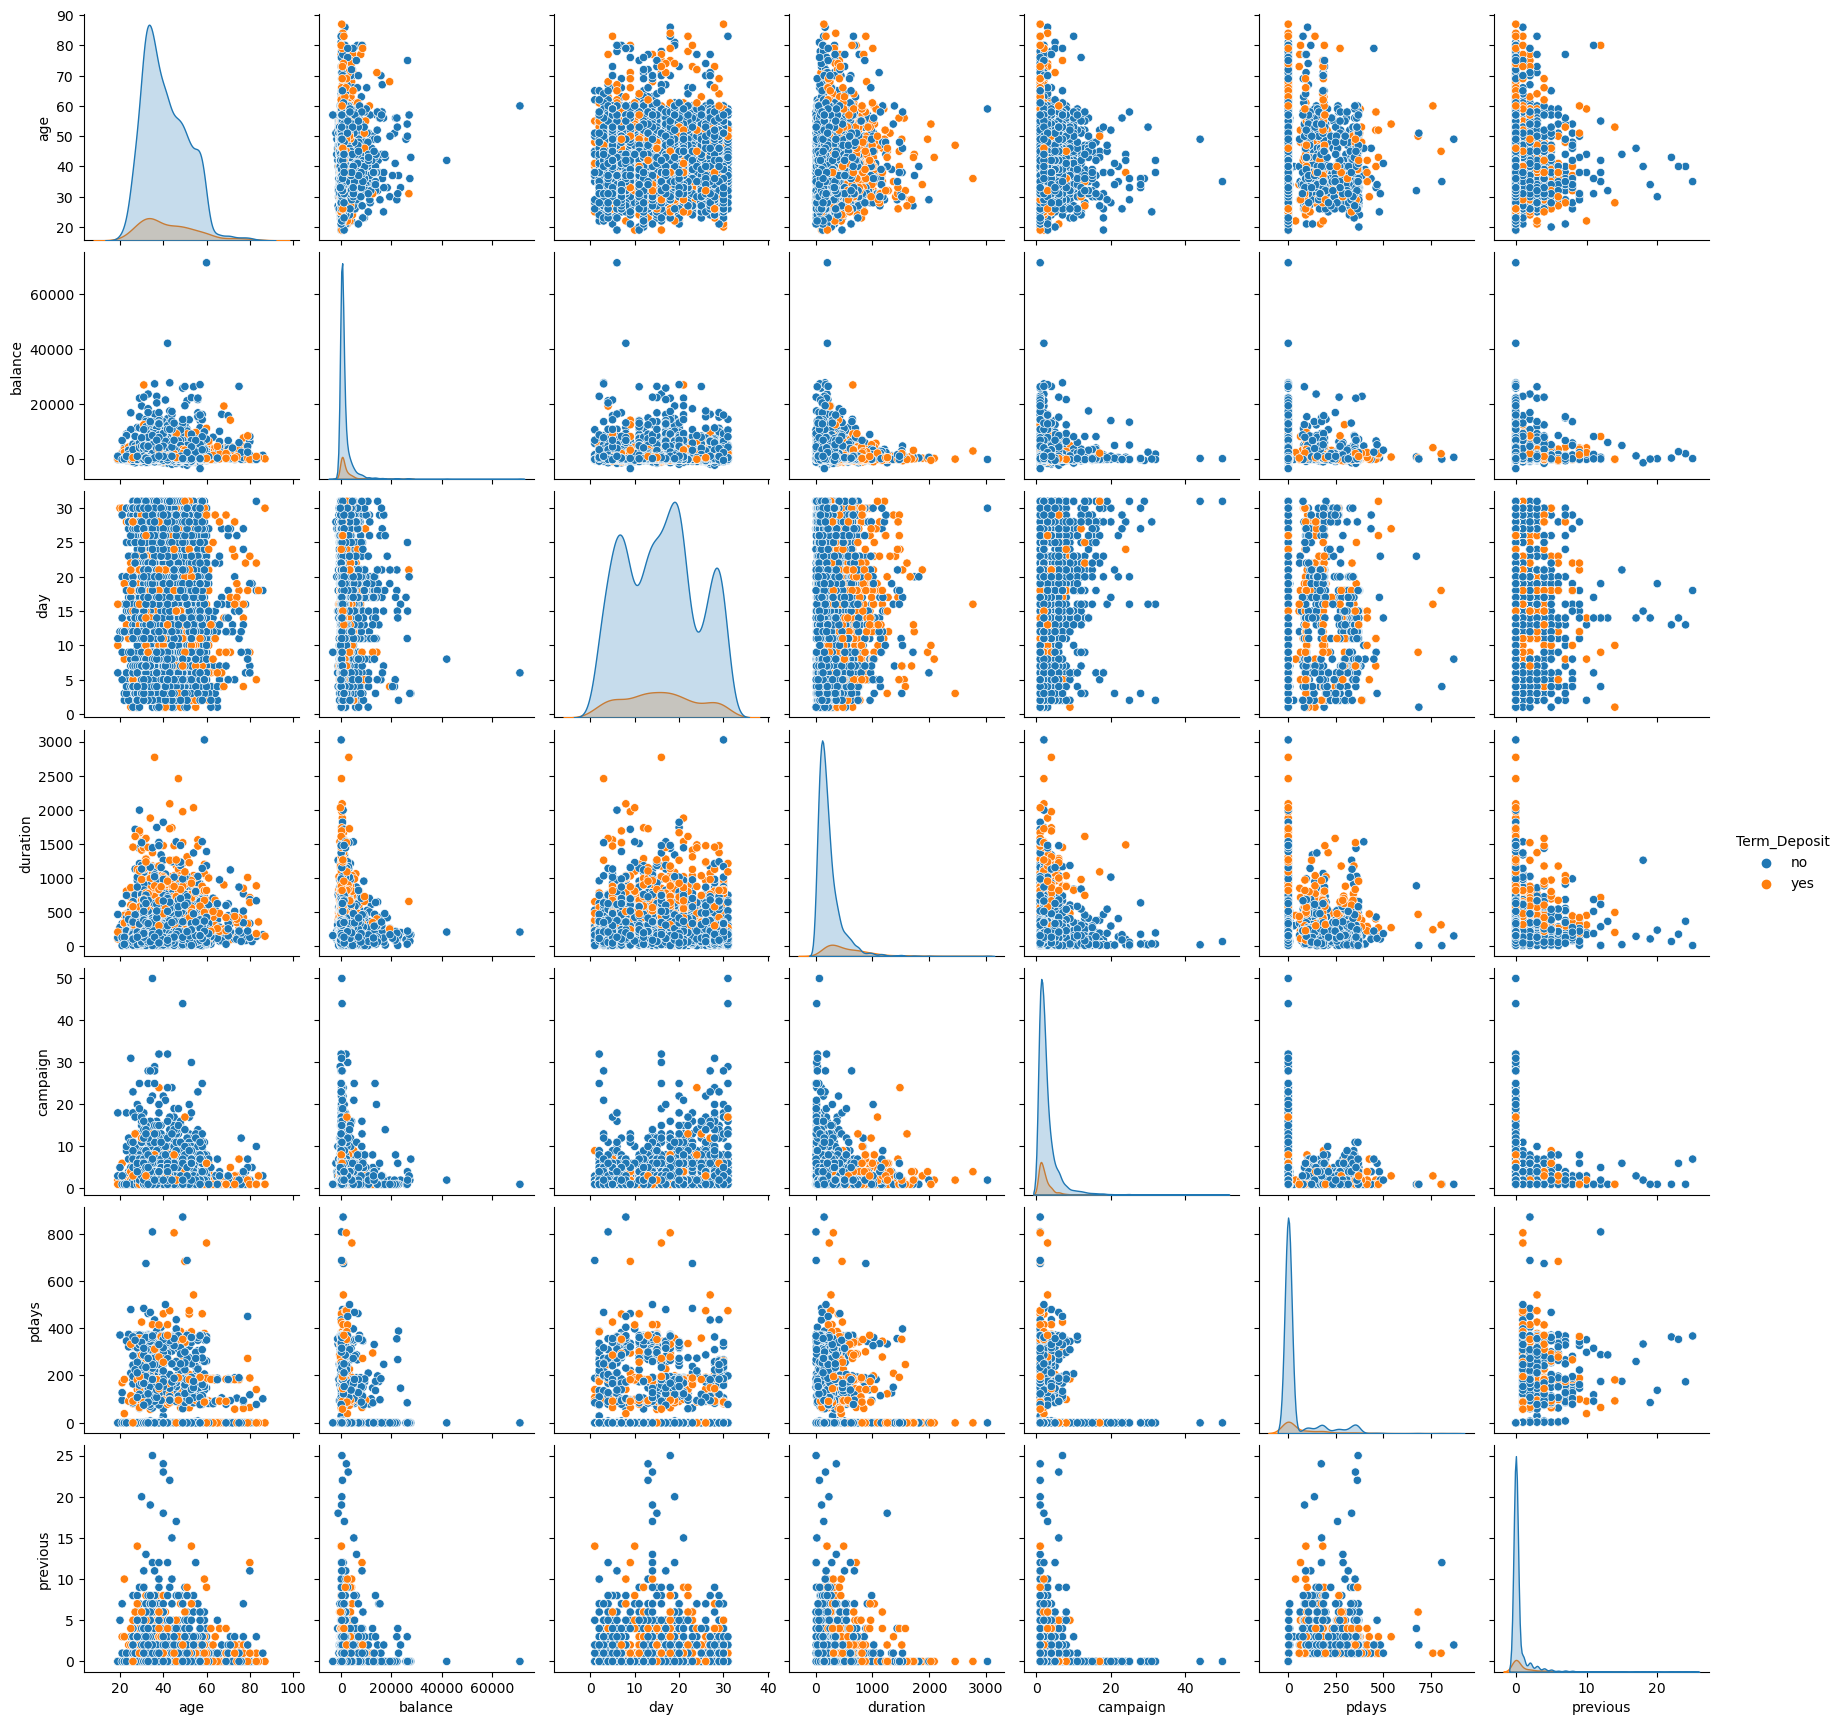

In [51]:
sns.pairplot(bank_df,hue='Term_Deposit')
plt.show()

## Outlier Tretment

In [60]:
num_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [61]:
#Checking numbers of observations beyond Upper & Lower Limit
Outlier_col = ['age', 'balance','duration', 'campaign', 'pdays', 'previous']
Q1 = bank_df[Outlier_col].quantile(0.25)
Q3 = bank_df[Outlier_col].quantile(0.75)
UL = Q3
LL = Q1
outliers = ((bank_df[Outlier_col] > UL) | (bank_df[Outlier_col] < LL)).sum()
print("Number of Observations Beyond Upper & Lower Limit for Each Column:")
display(outliers)

Number of Observations Beyond Upper & Lower Limit for Each Column:


age         2083
balance     2258
duration    2244
campaign     965
pdays        816
previous     816
dtype: int64

In [62]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [63]:
# Cap & floor the values beyond the outlier boundaries
#col = credit_df.drop['Default']
for i in Outlier_col:
    LL,UL = remove_outlier(bank_df[i])
    bank_df[i] = np.where(bank_df[i] > UL,UL,bank_df[i])
    bank_df[i] = np.where(bank_df[i] < LL,LL,bank_df[i])

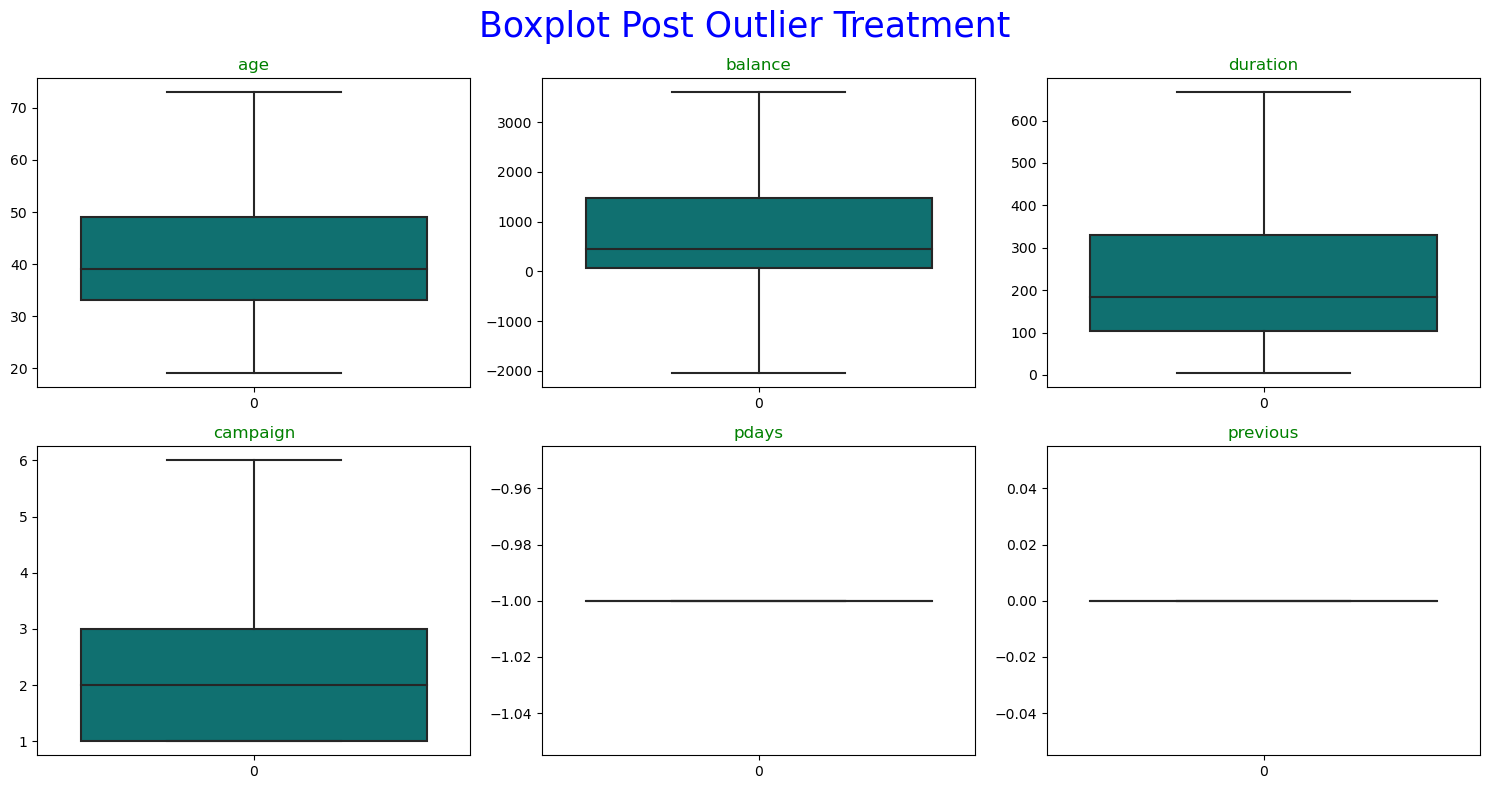

In [65]:
fig=plt.figure(figsize=(15,8))
plt.suptitle('Boxplot Post Outlier Treatment', fontsize = 25,color='blue')
for i in range(0,len(Outlier_col)):
    plt.subplot(2,3,i+1)
    sns.boxplot(bank_df[Outlier_col[i]],color='teal')
    plt.title(Outlier_col[i],color='green')
    #plt.title(cols[i],color='green')
fig.tight_layout()
plt.show()

In [66]:
bank_df[['pdays','previous']].describe().T

,count,mean,std,min,25%,50%,75%,max
pdays,4521.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
previous,4521.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
bank_df[bank_df['pdays'] != -1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_Deposit


In [68]:
bank_df[bank_df['previous'] > 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_Deposit


### Data Encoding

In [69]:
bank_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_Deposit
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79.0,1.0,-1.0,0.0,other,no
1,33.0,services,married,secondary,no,3596.5,yes,yes,cellular,11,may,220.0,1.0,-1.0,0.0,failure,no


In [70]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Term_Deposit'],
      dtype='object')

In [76]:
bank_df['Term_Deposit'].replace({'no':0,'yes':1},inplace=True)

In [77]:
bank_df['Term_Deposit'].value_counts()

Term_Deposit
0    4000
1     521
Name: count, dtype: int64

In [78]:
bank_df['default'].replace({'no':0,'yes':1},inplace=True)
bank_df['housing'].replace({'no':0,'yes':1},inplace=True)
bank_df['loan'].replace({'no':0,'yes':1},inplace=True)

In [80]:
bank_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_Deposit
0,30.0,unemployed,married,primary,0,1787.0,0,0,cellular,19,oct,79.0,1.0,-1.0,0.0,other,0
1,33.0,services,married,secondary,0,3596.5,1,1,cellular,11,may,220.0,1.0,-1.0,0.0,failure,0


In [75]:
from sklearn.preprocessing import LabelEncoder

In [81]:
col = ['job', 'marital', 'education','month','poutcome','contact']

In [82]:
label_encoder = LabelEncoder()
for column in col:
    bank_df[column] = label_encoder.fit_transform(bank_df[column])

In [84]:
# bank_df['contact'] = label_encoder.fit_transform(bank_df['contact'])

In [85]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_Deposit
0,30.0,10,1,0,0,1787.0,0,0,0,19,10,79.0,1.0,-1.0,0.0,1,0
1,33.0,7,1,1,0,3596.5,1,1,0,11,8,220.0,1.0,-1.0,0.0,0,0
2,35.0,4,2,2,0,1350.0,1,0,0,16,0,185.0,1.0,-1.0,0.0,0,0
3,30.0,4,1,2,0,1476.0,1,1,1,3,6,199.0,4.0,-1.0,0.0,1,0
4,59.0,1,1,1,0,0.0,1,0,1,5,8,226.0,1.0,-1.0,0.0,1,0


### Data Transformation

In [87]:
from sklearn.model_selection import train_test_split

In [86]:
X = bank_df.drop([ 'contact', 'pdays','previous','Term_Deposit'],axis =1)
y = bank_df['Term_Deposit']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [89]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train : (3164, 13)
Shape of X_test : (1357, 13)
Shape of y_train : (3164,)
Shape of y_test : (1357,)


In [90]:
y_train.value_counts(normalize=True)

Term_Deposit
0    0.88464
1    0.11536
Name: proportion, dtype: float64

In [91]:
y_test.value_counts(normalize=True)

Term_Deposit
0    0.885041
1    0.114959
Name: proportion, dtype: float64

## Treating target imbalance using SMOTE

In [92]:
from imblearn.over_sampling import SMOTE 

In [93]:
sm = SMOTE(random_state=42, sampling_strategy = .75)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [94]:
y_train_smote.value_counts(1)

Term_Deposit
0    0.571458
1    0.428542
Name: proportion, dtype: float64

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(random_state=42)

In [97]:
# Accuracy of the Train and Test data

print("Accuracy Score for Training Data is: ", dt.score(X_train_smote, y_train_smote))
print("Accuracy Score for Test Data is: ", dt.score(X_test, y_test))

Accuracy Score for Training Data is:  1.0
Accuracy Score for Test Data is:  0.8260869565217391


In [98]:
ytrain_pred = dt.predict(X_train_smote)
ytest_pred = dt.predict(X_test)

### Classification Report

In [101]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [103]:
print('Classification Report of the Training data:\n\n',classification_report(y_train_smote,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2799
           1       1.00      1.00      1.00      2099

    accuracy                           1.00      4898
   macro avg       1.00      1.00      1.00      4898
weighted avg       1.00      1.00      1.00      4898
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1201
           1       0.30      0.38      0.33       156

    accuracy                           0.83      1357
   macro avg       0.61      0.63      0.62      1357
weighted avg       0.85      0.83      0.83      1357



### Confusion Matrix

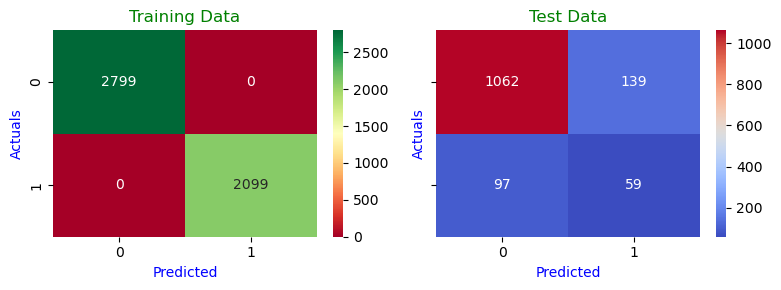

In [105]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((confusion_matrix(y_train_smote,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')


#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

### Measuring and Plotting AUC-ROC Curve

In [112]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, roc_curve

AUC for the Training Data: 1.000
AUC for the Test Data: 0.631


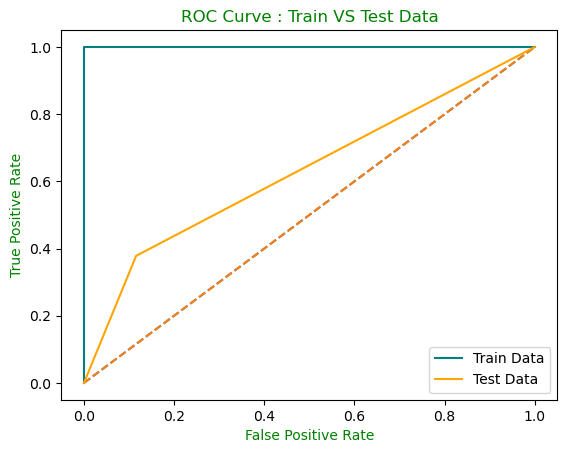

In [113]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = dt.predict_proba(X_train_smote)[:,1]
auc = roc_auc_score(y_train_smote,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train_smote,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = dt.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

### Applying GridsearchCV on Decission Tree Model

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
grid = {'criterion':["gini", "entropy", "log_loss"],
        'max_depth':[10,20,30],
        'min_samples_split':[2,3,5,7],
        'min_samples_leaf':[2,3,4,5],
        'min_impurity_decrease':[0.001,0.0001],
        }
grid_search = GridSearchCV(estimator = dt, param_grid = grid, cv = 10,n_jobs=-1,scoring='accuracy',verbose=1)
grid_search.fit(X_train_smote,y_train_smote)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30],
                         'min_impurity_decrease': [0.001, 0.0001],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 5, 7]},
             scoring='accuracy', verbose=1)

In [117]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'criterion': 'entropy', 'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 2, 'min_samples_split': 5} 

DecisionTreeClassifier(criterion='entropy', max_depth=20,
                       min_impurity_decrease=0.001, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)


### Building model on best parameters

In [119]:
best_model_dt = grid_search.best_estimator_
best_model_dt.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=20,
                       min_impurity_decrease=0.001, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

#### Accuracy of the Training and Test Data

In [120]:
print("Accuracy of Train data: ",best_model_dt.score(X_train_smote,y_train_smote))
print("Accuracy of Test data: ",best_model_dt.score(X_test,y_test))

Accuracy of Train data:  0.9371171906900776
Accuracy of Test data:  0.8349299926308033


In [121]:
ytrain_pred = best_model_dt.predict(X_train_smote)
ytest_pred = best_model_dt.predict(X_test)

### Classification Report

In [123]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train_smote,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.94      0.95      0.95      2799
           1       0.93      0.93      0.93      2099

    accuracy                           0.94      4898
   macro avg       0.94      0.94      0.94      4898
weighted avg       0.94      0.94      0.94      4898
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.93      0.88      0.90      1201
           1       0.34      0.46      0.39       156

    accuracy                           0.83      1357
   macro avg       0.63      0.67      0.65      1357
weighted avg       0.86      0.83      0.85      1357



#### Confusion Matrix

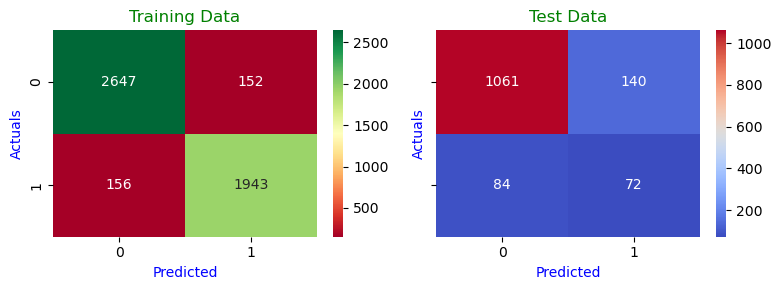

In [124]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train_smote,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')


#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

### Measuring and Plotting AUC-ROC Curve

AUC for the Training Data: 0.985
AUC for the Test Data: 0.747


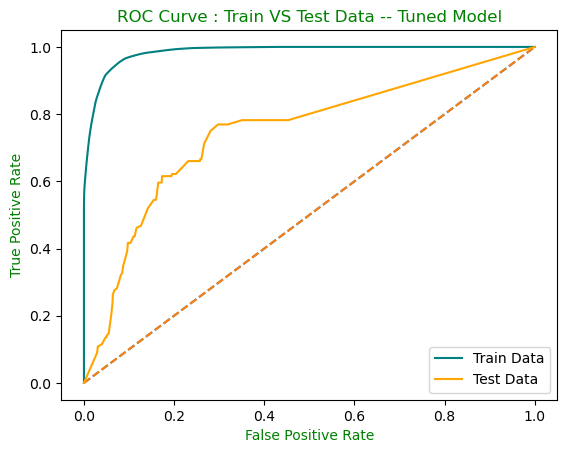

In [125]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = best_model_dt.predict_proba(X_train_smote)[:,1]
auc = metrics.roc_auc_score(y_train_smote,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = best_model_dt.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data -- Tuned Model",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()